In [1]:
from LinearRegression import implement_linear_regression, predict, compute_loss_mse, compute_loss_mae, compute_gradient_wi, compute_gradient_b, update_weight_wi, update_weight_b, predict, implement_linear_regression_nsamples
from PrepareData import prepare_data

In [2]:
y = predict(x1 = 1, x2 = 1, x3 = 1, w1 = 0, w2 = 0.5, w3 = 0, b = 0.5)
print(y)

1.0


In [3]:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [4]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [5]:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [6]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [7]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)   

0.50001


In [8]:
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [9]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [10]:
tv = 19.2
radio = 35.9 
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [11]:
tv = 230.1
radio = 37.8 
newspaper = 69.2

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 24.412408996908397


In [12]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [13]:
import matplotlib.pyplot as plt

[326.9667843262905, 16.813661135067065, 53.03153479688057, 9.097721194637154, 3.6424308051668244, 7.563752860234681, 22.66109565599889, 0.2903595791172754, 14.838547485180843, 24.076309414072263, 40.37629497003938, 5.1268803606027795, 13.518222414308081, 29.260234447005313, 6.298237914505083, 9.162549922566846, 0.026579461634628335, 26.706667137444764, 31.588025437397253, 7.299166664675038, 4.87832661040257, 0.06589490698448672, 4.659432930180689, 8.197887498801554, 10.726801676543044, 46.88850553057548, 37.00183951157569, 7.945648850356329, 13.192456099944478, 12.99508446043089, 3.692858118961234, 8.94362747789156, 30.181447411539107, 11.431671284831852, 36.174366413011626, 7.460278650398524, 86.65149410437682, 5.3701391264310505, 5.3518169904114785, 46.336728755672745, 2.5374346878656464, 1.4161484943898264, 6.706004362616138, 15.295560375546378, 9.923480328914641, 0.04638468028698762, 1.7385993721560624, 1.6392488216093404, 9.405606514050849, 5.91762067788424, 0.22728553410458135, 7

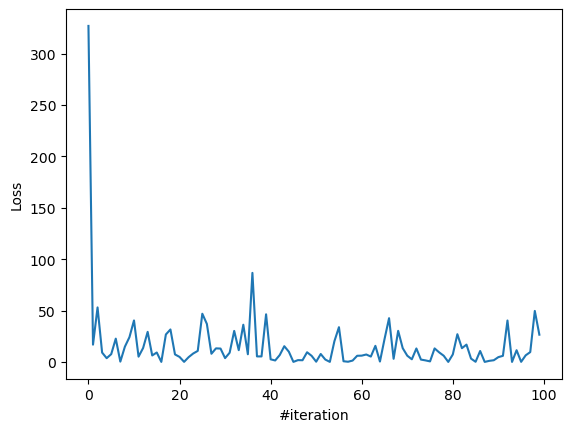

In [14]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(losses[0:100])
plt.plot(losses[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

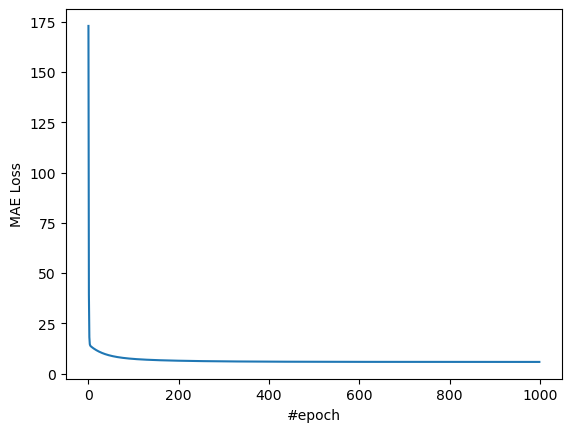

In [15]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [16]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [17]:
def min_max_scaling(X):

    max_value_1 = max(X[0])
    max_value_2 = max(X[1])
    max_value_3 = max(X[2])

    min_value_1 = min(X[0])
    min_value_2 = min(X[1])
    min_value_3 = min(X[2])

    max_list = [max_value_1, max_value_2, max_value_3]
    min_list = [min_value_1, min_value_2, min_value_3]

    
    X[0] = [(x - min_value_1) / (max_value_1 - min_value_1) for x in X[0]]
    X[1] = [(x - max_value_2) / (max_value_2 - min_value_2) for x in X[1]]
    X[2] = [(x - max_value_3) / (max_value_3 - min_value_3) for x in X[2]]
    
    return X

In [18]:
def z_mean_scaling(X):

    mean_value_1 = sum(X[0]) / len(X[0])
    mean_value_2 = sum(X[1]) / len(X[1])
    mean_value_3 = sum(X[2]) / len(X[2])



    std_value_1 = (sum((x-(sum(X[0]) / len(X[0])))**2 for x in X[0]) / (len(X[0])-1))**0.5
    std_value_2 = (sum((x-(sum(X[1]) / len(X[1])))**2 for x in X[1]) / (len(X[1])-1))**0.5
    std_value_3 = (sum((x-(sum(X[2]) / len(X[2])))**2 for x in X[2]) / (len(X[2])-1))**0.5


    
    X[0] = [(x - mean_value_1) / (std_value_1) for x in X[0]]
    X[1] = [(x - mean_value_2) / (std_value_2) for x in X[1]]
    X[2] = [(x - mean_value_3) / (std_value_2) for x in X[2]]
    
    return X

In [19]:
data1 = [1, 2, 3]
data2 = [4, 5, 6]
data3 = [7, 8, 9]
X = [data1, data2, data3]

X, min_list, max_list = min_max_scaling(X)
print(X)

[0.0, 0.5, 1.0]


In [20]:
def min_max_scaling(data1, data2, data3):
    data = data1 + data2 + data3
    
    max_value_1 = max(data1)
    max_value_2 = max(data2)
    max_value_3 = max(data3)

    min_value_1 = min(data1)
    min_value_2 = min(data2)
    min_value_3 = min(data3)
    
    data1 = [(x - min_value_1) / (max_value_1 - min_value_1) for x in data1]
    data2 = [(x - min_value_2) / (max_value_2 - min_value_2) for x in data2]
    data3 = [(x - min_value_3) / (max_value_3 - min_value_3) for x in data3]
    
    return (data1, data2, data3, max_value_1, max_value_2, max_value_3, min_value_1, min_value_2, min_value_3)

In [21]:
def scaling(X):
    data1 = X[0]
    data2 = X[1]
    data3 = X[2]
    data = data1 + data2 + data3
    
    print(data)
    max_value = max(data)
    min_value = min(data)
    mean_value = sum(data) / len(data)
    
    data1 = [(x - mean_value) / (max_value - min_value) for x in data1]
    data2 = [(x - mean_value) / (max_value - min_value) for x in data2]
    data3 = [(x - mean_value) / (max_value - min_value) for x in data3]
    
    return [data1, data2, data3]